<h1 style="text-align: center">
<div style="color: #DD3403; font-size: 60%">Data Science DISCOVERY MicroProject</div>
<span style="">MicroProject: Infinite Money in Roulette (Martingale Betting System)</span>
<div style="font-size: 60%;"><a href="https://discovery.cs.illinois.edu/microproject/infinite-money-in-roulette-martingale/">https://discovery.cs.illinois.edu/microproject/infinite-money-in-roulette-martingale/</a></div>
</h1>

<hr style="color: #DD3403;">

## The Martingale Betting System

The "Martingale Betting System" is a specific strategy that, when applied to the game of Roulette, involves the following actions:

- You will initially start by betting a small amount (ex: $1.00) on red.
- Based on the outcome:
  - **If you win** (the wheel lands on red), you will win your bet.  You have made $1.00 and you can repeat again with $1.00.
  - **Each time you lose**, you double your bet (initially, after one loss, a $2.00 bet; then $4.00; then $8.00; and so on) until you win.

Using this strategy, every bet will always recover all previous losses and **ALWAYS** result in a winning bet netting a win of $1.00.  *(Ex: A $4.00 bet that wins only happens after a $1.00 and $2.00 loss, still resulting in a +$1.00 net win.)*

Therefore, mathematically, this betting strategy will result in an **infinite increasing amount of money** so long as you play the game long enough!  In this MicroProject, we will explore this claim and use simulation to play Roulette using the Martingale Betting System.  Let's nerd out! :)

<hr style="color: #DD3403;">

## Part 1: Creating a Function to Play Roulette

To begin to test any betting system, we first need the logic to play the game.  In the game of Roulette, a large wheel with 38 slots is spun and a ball is placed into the spinning wheel.  As the spinning wheel slows down, the ball will land in one of the 38 slots with equal probability.  Each of the slots are labeled with a number **and** a color.  Here's the exact breakdown of a standard Roulette wheel in the United States:
- The numbers `0`, `00`, and then `1` through `36`
- The colors are:
    - The red numbers are: `32`, `19`, `21`, `25`, `34`, `27`, `36`, `30`, `23`, `5`, `16`, `1`, `14`, `9`, `18`, `7`, `12`, and `3` (18 total red numbers).
    - The black numbers are: `15`, `4`, `2`, `17`, `6`, `13`, `11`, `8`, `10`, `24`, `33`, `20`, `31`, `22`, `29`, `28`, `35`, and `26`  (18 total black numbers).
    - The green numbers are: `0` and `00` (2 total green numbers).


### Return Value

In the cell below, write a function called `playRoulette` that returns a Python dictionary that contains two keys:
- `number`, the number, and
- `color`, the corresponding color

For example:

```py
return { "number": number, "color": color }
```

Make sure `number` is a number, except for the case `00`, which should be the string "00".


### Helpful Code

To help you, it may be useful to use this logic to test if a number of in a list of red or black numbers:

---
```py
red_numbers = [32, 19, 21, 25, 34, 27, 36, 30, 23, 5, 16, 1, 14, 9, 18, 7, 12, 3]
if number in red_numbers:
  color = "red"

black_numbers = [15, 4, 2, 17, 6, 13, 11, 8, 10, 24, 33, 20, 31, 22, 29, 28, 35, 26]
if number in black_numbers:
  color = "black"
```
---


In [1]:
import pandas as pd
import random

def playRoulette():
    red_numbers = [32, 19, 21, 25, 34, 27, 36, 30, 23, 5, 16, 1, 14, 9, 18, 7, 12, 3]
    black_numbers = [15, 4, 2, 17, 6, 13, 11, 8, 10, 24, 33, 20, 31, 22, 29, 28, 35, 26]
    
    numbers = [0, "00", 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 
               17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 
               33, 34, 35, 36]
    number = random.choice(numbers)
    
    if number in red_numbers:
        color = "red"
    elif number in black_numbers:
        color = "black"
    else:
        color = "green"
    
    return {"number": number, "color": color}


## Observe your Function Results

The following code will show the results of your function 10 times.  Make sure it looks good!

In [2]:
for i in range(10):
  print(playRoulette())

{'number': 13, 'color': 'black'}
{'number': 4, 'color': 'black'}
{'number': 0, 'color': 'green'}
{'number': 15, 'color': 'black'}
{'number': 33, 'color': 'black'}
{'number': 27, 'color': 'red'}
{'number': 18, 'color': 'red'}
{'number': 25, 'color': 'red'}
{'number': 36, 'color': 'red'}
{'number': 2, 'color': 'black'}


In [3]:
### TEST CASE for Part 1: Creating a Function to Play Roulette
tada = "\N{PARTY POPPER}"

assert( "playRoulette" in vars() )

color_map = {}
for i in [32, 19, 21, 25, 34, 27, 36, 30, 23, 5, 16, 1, 14, 9, 18, 7, 12, 3]:
  color_map[i] = "red"
for i in [15, 4, 2, 17, 6, 13, 11, 8, 10, 24, 33, 20, 31, 22, 29, 28, 35, 26]:
  color_map[i] = "black"
for i in [0, "00"]:
  color_map[i] = "green"

occurrence = {}
n = 100000
for i in range(n):
  d = playRoulette()
  assert("number" in d), "Your return value did not have a dictionary entry for the key `number`"
  assert("color" in d), "Your return value did not have a dictionary entry for the key `color`"
  assert(d["number"] in color_map), f"You returned the `number` ${d['number']}, which isn't a valid result of Roulette"

  if (d["number"] not in occurrence):
    occurrence[d["number"]] = 0
  occurrence[d["number"]] += 1

ev = n / len(occurrence)
for num in color_map:
  assert(num in occurrence), f"Your function never returned the `number` ${num}"
  count = occurrence[num]

  assert((count / ev) >= 0.5), f"Your function returned the `number` ${num} far too few times"
  assert((count / ev) <= 1.5), f"Your function returned the `number` ${num} far too many times"

tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}") 

🎉 All tests passed! 🎉


<hr style="color: #DD3403;">

## Part 2: Simulation of Betting with $100,000

To test the Martingale Betting System, let's start playing with $100,000 (that's a lot of money)!

To do this, write a simulation that tracks your total amount of money as you play many games of roulette.  To do this, you'll want to initially set two variables outside of your simulation:
- `money = 100_000` ($100,000), your starting money
- `currentBet = 1`, your starting bet size

> **Useful Programming Tip**: In Python, you can use an underscore in the middle of a number and the underscore will be ignored by Python.  This makes is very useful in vary large numbers to group sets of zero.  For example:
>
> ```py
> one_million_dollars = 1000000    # Hard to count the number of zeros quickly
> # == OR ==
> one_million_dollars = 1_000_000  # Very easy to read it as 1,000,000
> ```

In your simulation, you'll want to play a game of roulette using your `playRoulette` once for each run of your simulation!
- If your simulation of the Roulette game results in a **red** number, you have won your `currentBet`!
    - Your **winnings** are your `currentBet`,
    - Your money for the next round must increase by your `currentBet` (ex: `money = money + currentBet`), **AND**
    - Your `currentBet` must reset back to $1.00
- If your simulation resulted in **anything except red**, you have lost your `currentBet`.
    - Your **winnings** is the negative value of `currentBet` (ex: `winnings = -1 * currentBet`),
    - Your money for the next round must decrease by your `currentBet` (ex: `money = money - currentBet`), **AND**
    - Your `currentBet` must double (ex: `currentBet = currentBet * 2`)

In your simulation, make sure to record all five of these real-world variables:
1. `money`, you current amount of money (before adding/subtracting any result from this round)
2. `currentBet`, your current bet size (before changing it this round)
3. `number`, the number the Roulette wheel landed on
4. `color`, the color the Roulette wheel landed on
4. `winnings`, the total amount of winning for this spin of the roulette wheel

Write your simulation below that simulates playing 1,000,000 games or Roulette and storing the reuslts in a DataFrame called `df`:

In [15]:
money = 100_000
currentBet = 1
data = []

for i in range(1_000_000):
    game_data = {"money": money, "currentBet": currentBet}

    result = playRoulette()
    number = result["number"]
    color = result["color"]

    game_data["number"] = number
    game_data["color"] = color

    if color == "red":
        winnings = currentBet
        money += currentBet
        currentBet = 1
    else:
        winnings = -currentBet
        money -= currentBet
        currentBet *= 2

    game_data["winnings"] = winnings
    data.append(game_data)

df = pd.DataFrame(data)
df

,money,currentBet,number,color,winnings
0,100000,1,27,red,1
1,100001,1,7,red,1
2,100002,1,9,red,1
3,100003,1,5,red,1
4,100004,1,0,green,-1
...,...,...,...,...,...
999995,573048,4,35,black,-4
999996,573044,8,26,black,-8
999997,573036,16,33,black,-16
999998,573020,32,12,red,32


In [16]:
### TEST CASE for Part 2: Simulation of Betting with $10,000
tada = "\N{PARTY POPPER}"

assert( "df" in vars() ), "Your simulation must be stored in df"

assert( "money" in df ), "Your DataFrame must have the column/variable \"money\""
assert( "currentBet" in df ), "Your DataFrame must have the column/variable \"currentBet\""
assert( "winnings" in df ), "Your DataFrame must have the column/variable \"winnings\""
assert( "color" in df ), "Your DataFrame must have the column/variable \"color\""
assert( "number" in df ), "Your DataFrame must have the column/variable \"number\""

assert( df.money.values[0] == 100000 ), "Your starting money must be $100,000"
assert( df.currentBet.values[0] == 1 ), "Your starting bet must be $1"
assert( len(df) == 1000000 ), "Your simulation must be of exactly 1,000,000 games"

uniqueBets = list(df.currentBet.unique())
maxBet = df.currentBet.unique().max()
curBet = 1
for i in range(len(uniqueBets)):
    val = 2 ** i
    if val in uniqueBets:
        uniqueBets.remove(2 ** i)

assert( len(uniqueBets) == 0 ), f"Your `bets` contains values that are not valid bets: {uniqueBets}"

redCount = len(df[df.color == "red"])
assert(abs(df.money.max() - redCount - 100000) < 10), "You should only make $1 every time `red` occurs, even in a streak."

tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


<hr style="color: #DD3403;">

## Part 3: Analysis of Infinite Money

The following code creates a line plot using `df.plot.line` and uses `money` as the `y`-axis value to create a plot of our current money:

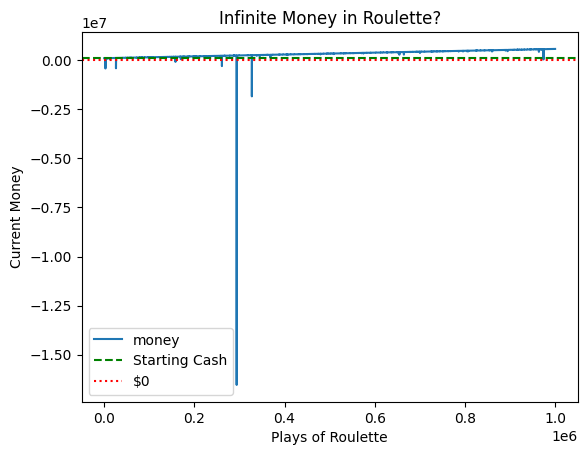

In [17]:
df.plot.line(y="money", xlabel="Plays of Roulette", ylabel="Current Money", title="Infinite Money in Roulette?")

# Add a red line at y=0 ($0) and a green line at your starting money (y=$100,000)
import matplotlib.pyplot as plt 
plt.axhline(y=100000, color="green", linestyle="dashed", label="Starting Cash") 
plt.axhline(y=0, color="red", linestyle="dotted", label="$0") 
plt.legend()

### Negative Money?

A casino requires you to have money to place a bet -- if your money ever went below $0, you couldn't make the bet.  In your 1,000,000 games, create a DataFrame of all games with a negative starting balance -- store that as `df_negativeBalance`:

In [18]:
# Find all rows with a negative starting balance:
df_negativeBalance = df[df['money'] < 0]
df_negativeBalance

,money,currentBet,number,color,winnings
2757,-29771,131072,0,green,-131072
2758,-160843,262144,00,green,-262144
2759,-422987,524288,3,red,524288
26125,-18627,131072,33,black,-131072
26126,-149699,262144,0,green,-262144
26127,-411843,524288,18,red,524288
158051,-87281,262144,19,red,262144
261076,-38614,262144,6,black,-262144
261077,-300758,524288,12,red,524288
293784,-23099,262144,17,black,-262144


### Required Bankroll

What is the largest amount of debt you had?  This is represents the **additional "bankroll"** (on top of the original $10,000) you would be required to have to be able to make the bet.  Store this answer as a postive number of the `additional_bankroll_needed`:

In [26]:
# Find the additional money you would have needed to have to bankroll these 100,000 games:
largest_debt = df_negativeBalance['money'].min()
additional_bankroll_needed = abs(largest_debt)
additional_bankroll_needed

np.int64(16538171)

In [27]:
### TEST CASE for Part 3: Analysis of Infinite Money
tada = "\N{PARTY POPPER}"

assert( "df_negativeBalance" in vars() )
assert( len(df_negativeBalance) == len(df) - len(df[df.money >= 0]) ), "Your df_negativeBalance does not contain all of the negative balances"

assert( "additional_bankroll_needed" in vars() )
assert( additional_bankroll_needed >= 0 ), "additional_bankroll_needed must be positive"
assert( additional_bankroll_needed == -df.money.min() ), "additional_bankroll_needed is incorrect"

def money(value):
  value = round(value, 2)
  return "${:,}".format(value)

import locale
locale.setlocale( locale.LC_ALL, '' )

tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}") 
print()
print(f"With your initial $100,000, you would have needed an ADDITIONAL {money(additional_bankroll_needed)} to be able to use this strategy.")
if additional_bankroll_needed > 1000000:
  print(f"...that's a lot of money! (!!)")
print(f"...in addition, every additional game you play has a chance to double the needed bankroll (to {money(additional_bankroll_needed * 2)}, then {money(additional_bankroll_needed * 4)}, etc).")

🎉 All tests passed! 🎉

With your initial $100,000, you would have needed an ADDITIONAL $16,538,171 to be able to use this strategy.
...that's a lot of money! (!!)
...in addition, every additional game you play has a chance to double the needed bankroll (to $33,076,342, then $66,152,684, etc).


<hr style="color: #DD3403;">

## Part 4: Table Limits

Being a millionaire, the bank roll you need may not be an issue and -- after 1,000,000 games -- you have still won about $470,000 *(you're expected to win about 18/38 times, each win winning $1)*.  All casinos that offer Roulette games will have a "table limit" -- a maximum bet you can make on any spin of a Roulette wheel.

Create a new simulation, identical to the simulation you created in Part 2, except that:
- You start with $1,000,000 (`money = 1_000_000`) instead of just $100,000 *(you're a millionaire after all!)*.
- The **maximum bet size is $10,000**.  If doubling would cause your `currentBet` to be over $10,000, reduce your `currentBet` to just $10,000. *(This means you may not always make all your money back when you win since you won't be able to bet enough to recover all your losses!)*

Identical to Part 2 (*you may want to begin by copy/pasting your Part 2 code below*), make sure your simulation below runs 1,000,000 times and contains the following five variables:

1. `money`, you current amount of money (before adding/subtracting any result from this round)
2. `currentBet`, your current bet size
3. `number`, the number the Roulette wheel landed on
4. `color`, the color the Roulette wheel landed on
5. `winnings`, the total amount of winning for this spin of the roulette wheel

Store your results in the DataFrame `df_withTableLimit`:

In [33]:
money = 1_000_000
currentBet = 1
max_bet = 10_000
data = []

for i in range(1_000_000):
    game_data = {"money": money, "currentBet": currentBet}

    result = playRoulette()
    number = result["number"]
    color = result["color"]

    game_data["number"] = number
    game_data["color"] = color

    if color == "red":
        winnings = currentBet
        money += currentBet
        currentBet = 1
    else:
        winnings = -currentBet
        money -= currentBet
        currentBet = min(currentBet * 2, max_bet)

    game_data["winnings"] = winnings
    data.append(game_data)

df_withTableLimit = pd.DataFrame(data)
df_withTableLimit

,money,currentBet,number,color,winnings
0,1000000,1,9,red,1
1,1000001,1,36,red,1
2,1000002,1,6,black,-1
3,1000001,2,30,red,2
4,1000003,1,8,black,-1
...,...,...,...,...,...
999995,294753,2,14,red,2
999996,294755,1,3,red,1
999997,294756,1,22,black,-1
999998,294755,2,19,red,2


In [34]:
### TEST CASE for Part 4: Simulation with Table Limits
tada = "\N{PARTY POPPER}"

assert( "df_withTableLimit" in vars() ), "Your simulation must be stored in df_withTableLimit"

assert( "money" in df_withTableLimit ), "Your DataFrame must have the column/variable \"money\""
assert( "currentBet" in df_withTableLimit ), "Your DataFrame must have the column/variable \"currentBet\""
assert( "winnings" in df_withTableLimit ), "Your DataFrame must have the column/variable \"winnings\""
assert( "color" in df_withTableLimit ), "Your DataFrame must have the column/variable \"color\""
assert( "number" in df_withTableLimit ), "Your DataFrame must have the column/variable \"number\""

assert( df_withTableLimit.money.values[0] == 1_000_000 ), "Your starting money must be $1,000,000"
assert( df_withTableLimit.currentBet.values[0] == 1 ), "Your starting bet must be $1"
assert( len(df) == 1_000_000 ), "Your simulation must be of exactly 1,000,000 games"

uniqueBets = list(df_withTableLimit.currentBet.unique())
maxBet = df_withTableLimit.currentBet.unique().max()
curBet = 1
for i in range(len(uniqueBets)):
    val = 2 ** i
    if val in uniqueBets and val < 10000:
        uniqueBets.remove(2 ** i)

uniqueBets.remove(10000)
assert( len(uniqueBets) == 0 ), f"Your `bets` contains values that are not valid bets: {uniqueBets}"

tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")


🎉 All tests passed! 🎉


<hr style="color: #DD3403;">

## Part 5: Analysis of Table Limits

Let's look at a data visualization of the simulation when table limits are put in place:

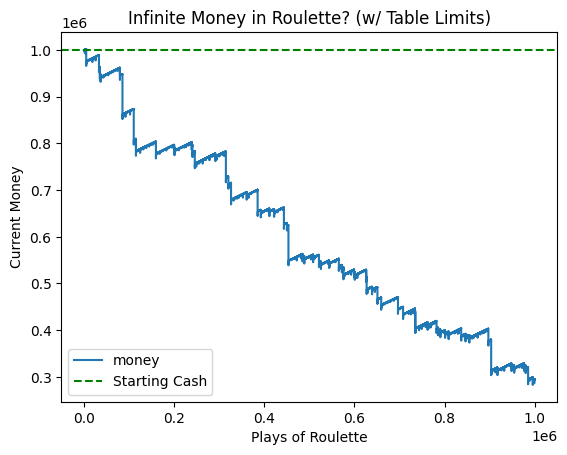

In [35]:
df_withTableLimit.plot.line(y="money", xlabel="Plays of Roulette", ylabel="Current Money", title="Infinite Money in Roulette? (w/ Table Limits)")

# Add a red line at y=0 ($0) and a green line at your starting money (y=$100,000)
import matplotlib.pyplot as plt 
plt.axhline(y=1000000, color="green", linestyle="dashed", label="Starting Cash") 
plt.legend()

### Money Lost

Calculate the **total money lost** after 1,000,000 games with table limits using your simulation stored in `df_withTableLimit`.  *(Remember, you started with $1,000,000.)*

In [40]:
totalLoss = 1e6 - df_withTableLimit['money'].iloc[-1]

totalLoss

np.float64(705243.0)

In [41]:
### TEST CASE for Part 5: Analysis of Losses in Games with Table Limits
tada = "\N{PARTY POPPER}"

assert( "totalLoss" in vars() )
assert( totalLoss == 1e6 - df_withTableLimit.iloc[-1].money )


def money(value):
  value = round(value, 2)
  return "${:,}".format(value)

tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")
print()
if totalLoss > 0:
  print(f"With your initial $1,000,000, you just turned into only {money(1_000_000 - totalLoss)}. (!!)")


🎉 All tests passed! 🎉

With your initial $1,000,000, you just turned into only $294,757.0. (!!)


<hr style="color: #DD3403;">

## Submission

You're almost done!  All you need to do is to commit your lab to GitHub and run the GitHub Actions Grader:

1.  ⚠️ **Make certain to save your work.** ⚠️ To do this, go to **File => Save All**

2.  After you have saved, exit this notebook and return to https://discovery.cs.illinois.edu/microproject/infinite-money-in-roulette-martingale/ and complete the section **"Commit and Grade Your Notebook"**.

3. If you see a 100% grade result on your GitHub Action, you've completed this MicroProject! 🎉